In [46]:
import random
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import array_equal

In [47]:
# Function to convert a given decimal number to a ternary
def ter(n):  
    ans = ""
    while n > 0: 
        dig = int(n%3)
        ans += str(dig)
        n //= 3
    ans = ans[::-1]  #To reverse the string
    return ans

In [48]:
def random_string(length):
    '''
    Returns a random bit string of the given length. 
    
    Parameters
    ----------
    length: int
        Posivite integer that specifies the desired length of the bit string.
        
    Returns
    -------
    out: list
        The random bit string given as a list, with int elements.
    '''
    if not isinstance(length, int) or length < 0:
        raise ValueError("input length must be a positive ingeter")
    return [random.randint(0,1) for _ in range(length)]

In [49]:
def lookup_table(rule_number):
    '''
    Returns a dictionary which maps ECA neighborhoods to output values. 
    Uses Wolfram rule number convention.
    
    Parameters
    ----------
    rule_number: int
        Integer value between 0 and 19682, inclusive. Specifies the ECA lookup table
        according to the Wolfram numbering scheme.
        
    Returns
    -------
    lookup_table: dict
        Lookup table dictionary that maps neighborhood tuples to their output according to the 
        ECA local evolution rule (i.e. the lookup table), as specified by the rule number. 
    '''
    if not isinstance(rule_number, int) or rule_number < 0 or rule_number > 19682:
        raise ValueError("rule_number must be an int between 0 and 19682, inclusive")
    neighborhoods = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]
    in_ternary = '{:{fill}{align}{width}}'.format(ter(rule_number), 
                                                  fill='0', 
                                                  align='>', 
                                                  width='9')
    
    return dict(zip(neighborhoods, map(int,reversed(in_ternary)))) # use map so that outputs are ints, not strings

In [50]:
class ECA(object):
    '''
    Elementary cellular automata simulator.
    '''
    def __init__(self, rule_number, initial_condition):
        '''
        Initializes the simulator for the given rule number and initial condition.
        
        Parameters
        ----------
        rule_number: int
            Integer value between 0 and 19682, inclusive. Specifies the ECA lookup table
            according to the Wolfram numbering scheme.
        initial_condition: list
            Binary string used as the initial condition for the ECA. Elements of the list
            should be ints. 
        
        Attributes
        ----------
        lookup_table: dict
            Lookup table for the ECA given as a dictionary, with neighborhood tuple keys. 
        initial: array_like
            Copy of the initial conditions used to instantiate the simulator
        spacetime: array_like
            2D array (list of lists) of the spacetime field created by the simulator.
        current_configuration: array_like
            List of the spatial configuration of the ECA at the current time
        '''
        # we will see a cleaner and more efficient way to do the following when we introduce numpy
        for i in initial_condition:
            if i not in [0,1,2]:
                raise ValueError("initial condition must be a list of 0s 1s and 2s")
                
        self.lookup_table = lookup_table(rule_number)
        self.initial = initial_condition
        self.spacetime = [initial_condition]
        self.current_configuration = initial_condition.copy()
        self._length = len(initial_condition)

    def evolve(self, time_steps):
        '''
        Evolves the current configuration of the ECA for the given number of time steps.
        
        Parameters
        ----------
        time_steps: int
            Positive integer specifying the number of time steps for evolving the ECA.  
        '''
        if time_steps < 0:
            raise ValueError("time_steps must be a non-negative integer")
        # try converting time_steps to int and raise a custom error if this can't be done
        try:
            time_steps = int(time_steps)
        except ValueError:
            raise ValueError("time_steps must be a non-negative integer")

        for _ in range(time_steps): # use underscore if the index will not be used
            new_configuration = []
            for i in range(self._length):

                neighborhood = (self.current_configuration[(i-1)], 
                                self.current_configuration[i])

                new_configuration.append(self.lookup_table[neighborhood])

            self.current_configuration = new_configuration
            self.spacetime.append(new_configuration)

In [51]:
def spacetime_diagram(spacetime_field, size=12, colors=plt.cm.Greys):
    '''
    Produces a simple spacetime diagram image using matplotlib imshow with 'nearest' interpolation.
    
   Parameters
    ---------
    spacetime_field: array-like (2D)
        1+1 dimensional spacetime field, given as a 2D array or list of lists. Time should be dimension 0;
        so that spacetime_field[t] is the spatial configuration at time t. 
        
    size: int, optional (default=12)
        Sets the size of the figure: figsize=(size,size)
    colors: matplotlib colormap, optional (default=plt.cm.Greys)
        See https://matplotlib.org/tutorials/colors/colormaps.html for colormap choices.
        A colormap 'cmap' is called as: colors=plt.cm.cmap
    '''
    plt.figure(figsize=(size,size))
    plt.imshow(spacetime_field, cmap=colors, interpolation='nearest')
    plt.show()

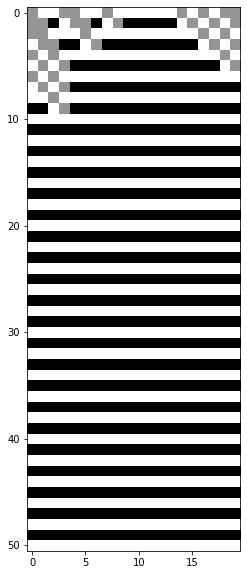

In [53]:
rule_110 = ECA(110, random_string(20))
rule_110.evolve(50)
spacetime_diagram(rule_110.spacetime, 10)

In [54]:
def test_simulator0():
    ca = ECA(0, random_string(20))
    ca.evolve(20)
    obs_field = ca.spacetime
    expected_config = [0,]*20
    
    for time, observed_config in enumerate(obs_field[1:]): # skip the random initial condition
        assert array_equal(observed_config, expected_config), \
        "configuration at time {} not correct".format(time)
    print('All configurations correct!') # remove if using testing framework like nose

In [55]:
test_simulator0()

All configurations correct!


In [56]:
def test_simulator19682():
    ca = ECA(19682, random_string(20))
    ca.evolve(20)
    obs_field = ca.spacetime
    expected_config = [2,]*20
    
    for time, observed_config in enumerate(obs_field[1:]): # skip the random initial condition
        assert array_equal(observed_config, expected_config), \
        "configuration at time {} not correct".format(time)
    print('All configurations correct!') # remove if using testing framework like nose

In [57]:
test_simulator19682()

All configurations correct!


In [58]:
def test_simulator90():
    initial = [0,0,0,1,0]
    ca = ECA(90, initial)
    ca.evolve(2)
    obs_field = ca.spacetime
    expected_config_1 = [0, 0, 0, 0, 0]
    expected_config_2 = [0, 0, 0, 0, 0]
    assert array_equal(obs_field[1], expected_config_1), \
    "time step 1 is incorrect"
    assert array_equal(obs_field[2], expected_config_2),\
    "time step 2 is incorrect"
    print('both time steps give correct output') # remove if using testing framework like nose

In [59]:
test_simulator90()

both time steps give correct output
